# Climate Change Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sci

In [28]:
#data
datadir = './data/'
global_mean_temp = pd.read_csv(datadir + 'global-mean-temp.csv')
monthly_c02 = pd.read_csv(datadir + 'co2_mm_mlo.csv')
c02_1880_1958 = pd.read_excel(datadir + 'carbon-ppm-1880-1958.xlsx')

In [10]:
global_mean_temp.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.13,-0.22,-.21,-.16,-.16,***,***,-0.11,-0.15,-.19
1,1881,-0.18,-0.13,0.04,0.06,0.07,-0.17,0.02,-0.02,-0.14,-0.20,-.17,-.05,-.07,-.08,-.16,0.06,-0.06,-.17
2,1882,0.18,0.15,0.06,-0.15,-0.13,-0.22,-0.15,-0.06,-0.13,-0.22,-.15,-.34,-.10,-.07,.09,-0.08,-0.14,-.17
3,1883,-0.28,-0.36,-0.11,-0.17,-0.16,-0.07,-0.05,-0.12,-0.20,-0.10,-.22,-.10,-.16,-.18,-.33,-0.15,-0.08,-.17
4,1884,-0.12,-0.06,-0.35,-0.39,-0.33,-0.35,-0.31,-0.26,-0.26,-0.24,-.32,-.30,-.27,-.26,-.09,-0.36,-0.31,-.28


In [11]:
monthly_c02.head()

,year,month,decimal date,average,interpolated,trend,ndays,unc. of mon mean
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [20]:
c02_1880_1958.tail()

,year,mean
74,1954,313.20
75,1955,313.70
76,1956,314.30
77,1957,314.80
78,1958,315.34


### Co2 Levels and GMTA (part a)

In [82]:
#preprocessing

gmta_raw = global_mean_temp.iloc[:, :13]
gmta_raw['mean'] = gmta_raw.iloc[:,1:].mean(axis=1)
gmta = gmta_raw[['Year', 'mean']] 

monthly_c02_renamed = monthly_c02.copy()
monthly_c02_renamed['mean'] = monthly_c02['average']
monthly_c02_renamed = monthly_c02_renamed.drop(['average'], axis=1)
monthly_c02_grouped = monthly_c02_renamed[['year', 'mean']].groupby(['year'], as_index=False).mean()

co2 = c02_1880_1958.iloc[:-1,:].append(monthly_c02_grouped)

co2.head()

,year,mean
0,1880,290.8
1,1881,291.4
2,1882,292.0
3,1883,292.5
4,1884,292.9


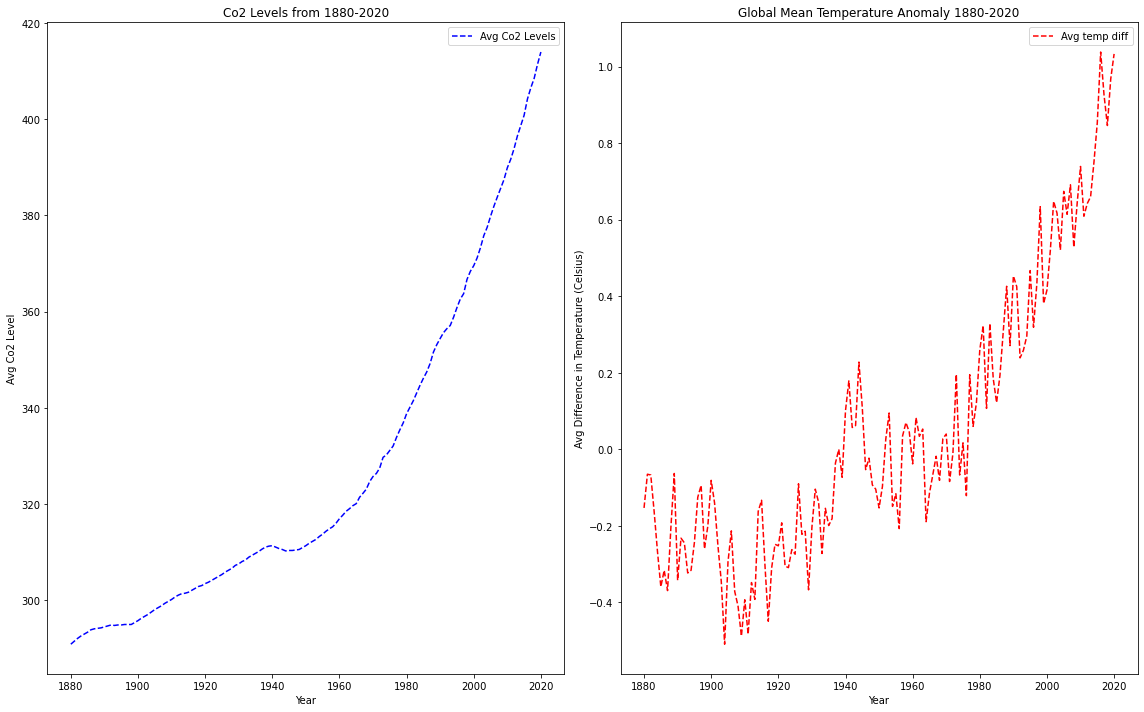

In [83]:
#plot

plt.figure(figsize=(16,10))

#co2
plt.subplot(121)
plt.plot(co2['year'], co2['mean'], 'b--', label='Avg Co2 Levels')
plt.title('Co2 Levels from 1880-2020')
plt.xlabel('Year')
plt.ylabel('Avg Co2 Level')
plt.legend(loc='best')

#gmta
plt.subplot(122)
plt.plot(gmta['Year'], gmta['mean'], 'r--', label='Avg temp diff')
plt.title('Global Mean Temperature Anomaly 1880-2020')
plt.xlabel('Year')
plt.ylabel('Avg Difference in Temperature (Celsius)')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


### co2 vs gmta (part b)

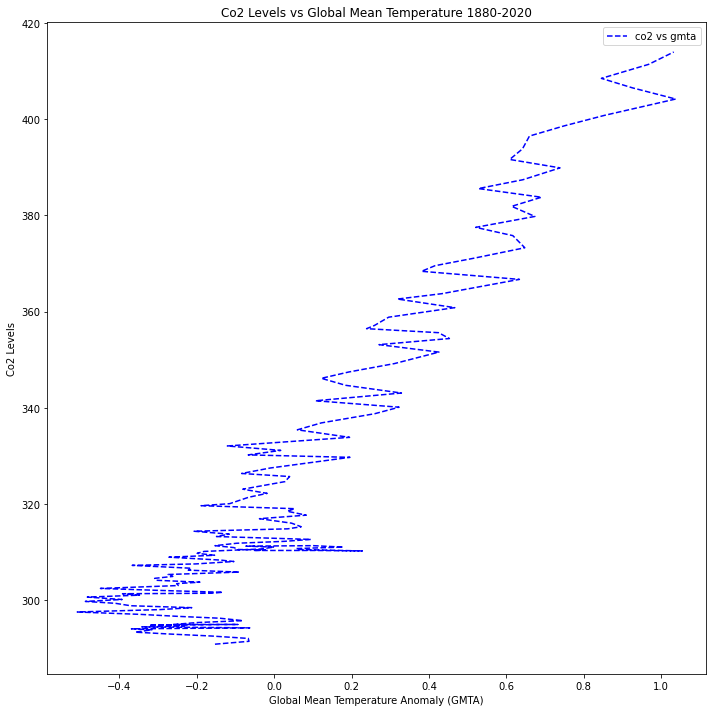

In [85]:
plt.figure(figsize=(10,10))
plt.plot(gmta['mean'], co2['mean'], 'b--', label='co2 vs gmta')
plt.title('Co2 Levels vs Global Mean Temperature 1880-2020')
plt.xlabel('Global Mean Temperature Anomaly (GMTA)')
plt.ylabel('Co2 Levels')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

### Linear fit for co2 vs gmta (part c)

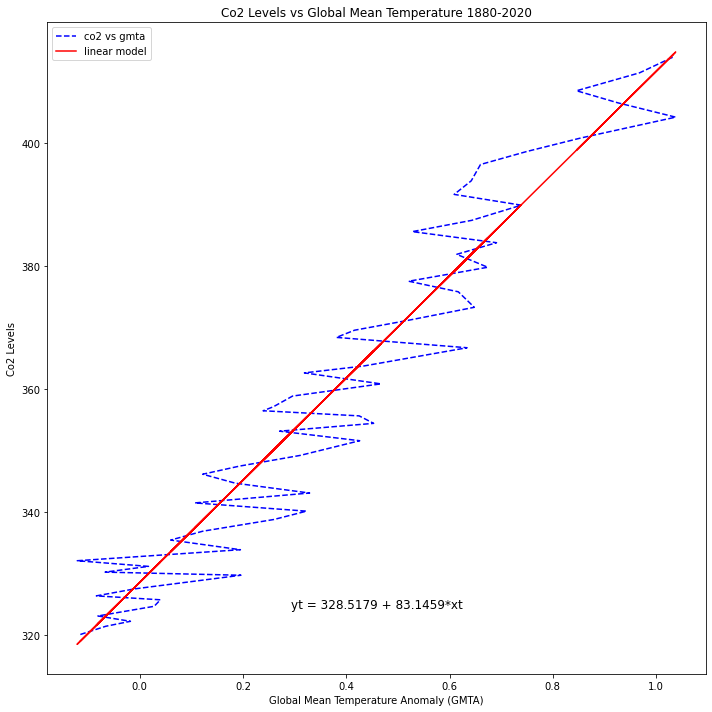

In [90]:
from scipy.optimize import curve_fit

def linear(x, a, b):
    return a + b*x

gmta_1965_2020 = gmta[gmta['Year'].isin(range(1965, 2021))]
co2_1965_2020 = co2[co2['year'].isin(range(1965, 2021))]

x = np.array(gmta_1965_2020['mean'])
y = np.array(co2_1965_2020['mean'])

popt, pcov = curve_fit(linear, x, y)
ypred = linear(x, *popt)


#plot
plt.figure(figsize=(10,10))
plt.plot(x, y, 'b--', label='co2 vs gmta')
plt.plot(x, ypred, 'r-', label='linear model')
plt.title('Co2 Levels vs Global Mean Temperature 1880-2020')
plt.xlabel('Global Mean Temperature Anomaly (GMTA)')
plt.ylabel('Co2 Levels')
plt.legend(loc='best')

ytpred_string = r'yt = %1.4f + %1.4f*xt' % (popt[0],popt[1])
plt.text(0.5, 0.1, ytpred_string, {'size':12}, horizontalalignment="center", transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

### Modeling Co2 (part d)

In [99]:
#models

def linear(x, a, b):
    return a + b*x

def quadratic(x, a, b):
    return a + b*x**2

def exponential(x, a, b):
    return a + b*np.exp(x)

'''sum of squares'''
def ss(x):
    return sum(x**2)

'''degrees of freedom'''
def dof(x, p):
    return len(x) - p

'''R^2 function
if p = 0: return R^2
if p > 0: return adjuested R^2 
'''
def R2(r, y, p=0):
    return 1 - (sum(r**2))/(sum((y-np.mean(y))**2)) * (len(y)/(len(y)-p))

'''F-Test'''
def F(r1, r2, p1, p2):
    return ((ss(r1) - ss(r2)) / ss(r2) ) / ((dof(r1, p1) - dof(r2, p2)) / dof(r2, p2) )

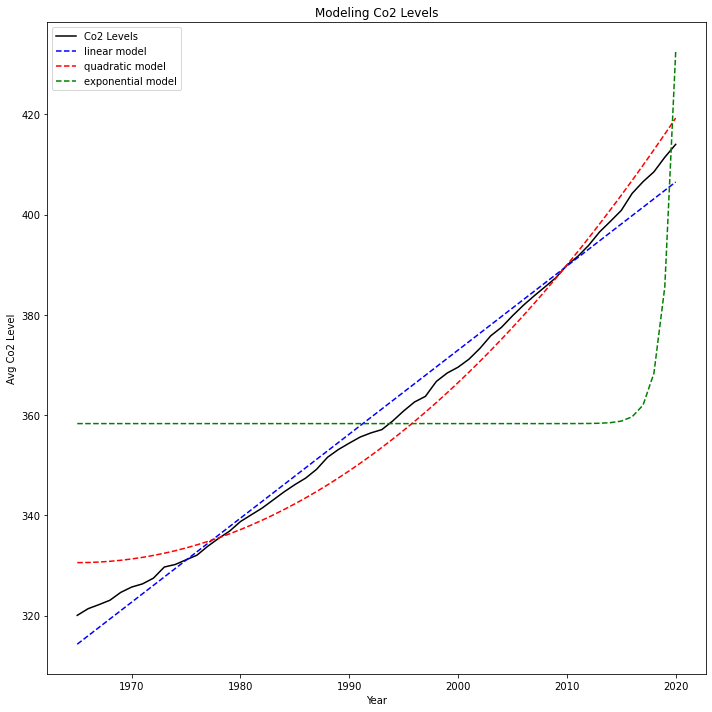

In [101]:

#subtract 1965 from year
x = np.array(co2_1965_2020['year'] - 1965)
y = np.array(co2_1965_2020['mean'])

lin_popt, lin_pcov = curve_fit(linear, x, y)
lin_ypred = linear(x, *lin_popt)

quad_popt, quad_pcov = curve_fit(quadratic, x, y)
quad_ypred = quadratic(x, *quad_popt)

exp_popt, exp_pcov = curve_fit(exponential, x, y)
exp_ypred = exponential(x, *exp_popt)

plt.figure(figsize=(10,10))
plt.plot(x+1965, y, 'k-', label='Co2 Levels')
plt.xlabel('Year')
plt.ylabel('Avg Co2 Level')
plt.title('Modeling Co2 Levels')

plt.plot(x+1965, lin_ypred, 'b--', label="linear model")
plt.plot(x+1965, quad_ypred, 'r--', label='quadratic model')
plt.plot(x+1965, exp_ypred, 'g--', label='exponential model')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [94]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])